In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof T. Sandhan, Department of Electrical Engineering, IIT Kanpur

Q1. Colour processing

In this question, first we will change image from RGB colour space to Gray and HSV colour space. then in the second part we have to write a program which will delete a particular colour from a coloured image and the reverse problem, in which it will delete all colours but one from a coloured image.

Some references:

1) https://docs.opencv.org/4.5.1/df/d9d/tutorial_py_colorspaces.html

2) https://docs.opencv.org/4.5.1/de/d25/imgproc_color_conversions.html

3) https://en.wikipedia.org/wiki/HSL_and_HSV#Color_conversion_formulae

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def bgr2gray(img):
  ''' 
  Write a program which takes an 3 channel uint8 np array of color image and 
  convertes it to a single channel uint8 np array of gray image.

  Input:
  - img - 3 Channel uint8 np array in order bgr

  Output: 
  - gray_img - single channel uint8 np array gray image.

  Allowed modules:
  - Numpy, Math(if needed)
  - you are not allowed to use any cv functions or direct implementations.

  '''

  #############################
  # Start your code from here #
  #############################

  gray_img = 0.299*img[:,:,2] + 0.587*img[:,:,1] + 0.114*img[:,:,0]

  #############################
  # End your code here ########
  #############################    
    
  return gray_img

In [ ]:
def bgr2hsv(img):
  ''' 
  Write a program which takes an 3 channel uint8 np array of image in BGR space 
  and convertes it to a 3 channel uint8 np array of image in HSV space.

  Input:
  - img - 3 Channel uint8 np array in order bgr

  Output: 
  - out_img - 3 channel uint8 np array image in HSV order.

  Allowed modules:
  - Numpy, Math(if needed)
  - you are not allowed to use any cv functions or direct implementations.

  '''

  #############################
  # Start your code from here #
  #############################


  out_imgx = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img = img/255
  out_img = np.empty((img.shape))
  out_img[:,:,2] = np.max(img, axis=2)
  tmp_mat = out_img[:,:,2]-np.min(img, axis=2)
  out_img[:,:,1] = np.where(out_img[:,:,2] == 0, 0, np.true_divide(tmp_mat, out_img[:,:,2]))
  opb = np.where(out_img[:,:,2] == img[:,:,2], 60*np.true_divide((img[:,:,1]-img[:,:,0]),tmp_mat), np.zeros((img.shape[0], img.shape[1])))
  opg = np.where(out_img[:,:,2] == img[:,:,1], 120 + 60*np.true_divide((img[:,:,0]-img[:,:,2]),tmp_mat), np.zeros((img.shape[0], img.shape[1])))
  opr = np.where(out_img[:,:,2] == img[:,:,0], 240 + 60*np.true_divide((img[:,:,2]-img[:,:,1]),tmp_mat), np.zeros((img.shape[0], img.shape[1])))
  out_img[:,:,0] = (opb+opg+opr).astype(np.uint8)
  out_img[:,:,0] = (out_img[:,:,0]+360)%360
  out_img[:,:,0] /= 2
  out_img[:,:,1] *= 255
  out_img[:,:,2] *= 255
  out_img = out_img.astype(np.uint8)
  
  #############################
  # End your code here ########
  #############################    
    
  return out_img

In [ ]:
def filter_color(img, color):
  '''
  Write a program takes a coloured image and returns a colored image filtering a
  specific colour from it. The ouput image will not cosists of that one colour,
  but other colours are not affected. 
  For example, if the image is of rainbow and we choose to filter orange colour 
  then the output image will consists of all colours except orange, the pixels 
  containing the orange colors are converted to gray.

  Inputs:
  - img     - 3 channel uint8 np array containg an image in bgr format
  - color   - the 3x1 array containg the bgr values of colour which is to be
              filtered from image

  Output:
  - out_img - 3 channel uint8 np array containg colour filtered image in RGB format

  Allowed modules:
  - Numpy, cv, math(if required).
  - You are not allowed to use any direct implimentations.

  Hint:
  - Use HSV colour space to find the pixels containing that colour

  '''
  #############################
  # Start your code from here #
  #############################

  out_img = np.copy(img)
  hsv_img = bgr2hsv(img)
  
  color_gray = int(0.299*color[2] + 0.587*color[1] + 0.114*color[0])
  col_cp = np.copy(color)
  col_cp = col_cp.astype(float) / 255
  color_hsv = np.empty(3)
  color_hsv[2] = np.max(col_cp)
  color_hsv[1] = 0 if color_hsv[2] == 0 else (color_hsv[2]-np.min(col_cp))/color_hsv[2]
  if color_hsv[2] == col_cp[0]:
    color_hsv[0] = 240 + 60*(col_cp[2]-col_cp[1])/(color_hsv[2]-np.min(col_cp))
  elif color_hsv[2] == col_cp[1]:
    color_hsv[0] = 120 + 60*(col_cp[0]-col_cp[2])/(color_hsv[2]-np.min(col_cp))
  else:
    color_hsv[0] = 60*(col_cp[1]-col_cp[0])/(color_hsv[2]-np.min(col_cp))
  color_hsv[0] = ((color_hsv[0]+360)%360)//2
  color_hsv[1] *= 255
  color_hsv[2] *= 255
  color_hsv = color_hsv.astype(np.uint8)

  H_ch = hsv_img[:,:,0]
  S_ch = hsv_img[:,:,1]
  V_ch = hsv_img[:,:,2]

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if H_ch[i,j] >= color_hsv[0]-9 and H_ch[i,j] <= color_hsv[0]+1 and S_ch[i,j] >= 50 and V_ch[i,j] >= 50 :  
        out_img[i,j] = color_gray

  out_img = out_img[:,:,[2,1,0]]

  #############################
  # End your code here ########
  #############################    
    
  return out_img


In [ ]:
def color_pop(img, color):
  '''
  Write a program which pops a particular colour in a coloured image. This problem 
  is inverse to the previous one. Here all the colours are converted to gray 
  except the color given.
  
  Inputs:
  - img     - 3 channel uint8 np array containg an image in bgr format
  - color   - the 3x1 array containg the bgr values of colour which is to be
              popped in image

  Output:
  - out_img - 3 channel uint8 np array containg colour popped image in RGB format

  Allowed modules:
  - Numpy, cv, math(if required).
  - You are not allowed to use any direct implimentations.

  Hint:
  - Use HSV colour space to find the pixels containing that colour

  '''
  #############################
  # Start your code from here #
  #############################
    
  out_img = np.copy(img)
  hsv_img = bgr2hsv(img)
  
  color_gray = int(0.299*color[2] + 0.587*color[1] + 0.114*color[0])
  col_cp = np.copy(color)
  col_cp = col_cp.astype(float) / 255
  color_hsv = np.empty(3)
  color_hsv[2] = np.max(col_cp)
  color_hsv[1] = 0 if color_hsv[2] == 0 else (color_hsv[2]-np.min(col_cp))/color_hsv[2]
  if color_hsv[2] == col_cp[0]:
    color_hsv[0] = 240 + 60*(col_cp[2]-col_cp[1])/(color_hsv[2]-np.min(col_cp))
  elif color_hsv[2] == col_cp[1]:
    color_hsv[0] = 120 + 60*(col_cp[0]-col_cp[2])/(color_hsv[2]-np.min(col_cp))
  else:
    color_hsv[0] = 60*(col_cp[1]-col_cp[0])/(color_hsv[2]-np.min(col_cp))
  color_hsv[0] = ((color_hsv[0]+360)%360)//2
  color_hsv[1] *= 255
  color_hsv[2] *= 255
  color_hsv = color_hsv.astype(np.uint8)

  H_ch = hsv_img[:,:,0]
  S_ch = hsv_img[:,:,1]
  V_ch = hsv_img[:,:,2]

  out_img[:,:,:] = color_gray

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if H_ch[i,j] >= color_hsv[0]-15 and H_ch[i,j] <= color_hsv[0]+15 and S_ch[i,j] >= 50 and V_ch[i,j] >= 20:  
        out_img[i,j] = img[i,j]

  out_img = out_img[:,:,[2,1,0]]

  #############################
  # End your code here ########
  #############################    
    
  return out_img




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


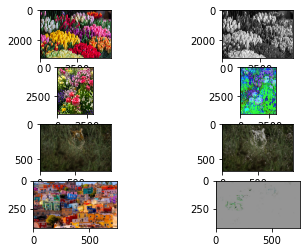

In [ ]:
im1 = cv2.imread("im1_1.jpg")
im2 = cv2.imread("im1_2.jpg")
im3 = cv2.imread("im1_3.jpg")
im4 = cv2.imread("im1_4.jpg")

im1_gray = bgr2gray(im1)
im2_hsv = bgr2hsv(im2)
im3_filtered = filter_color(im3, [0, 165, 255])
im4_pop = color_pop(im4, [0, 255, 0])

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)

plt.subplot(4, 2, 1)
plt.imshow(im1)
plt.subplot(4, 2, 2)
plt.imshow(im1_gray, cmap='gray')
plt.subplot(4, 2, 3)
plt.imshow(im2)
plt.subplot(4, 2, 4)
plt.imshow(im2_hsv, cmap='hsv')
plt.subplot(4, 2, 5)
plt.imshow(im3)
plt.subplot(4, 2, 6)
plt.imshow(im3_filtered)
plt.subplot(4, 2, 7)
plt.imshow(im4)
plt.subplot(4, 2, 8)
plt.imshow(im4_pop)
plt.show()

